In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

import os

np.random.seed(42)

Главные параметры для извлечения удара сердца.

In [4]:
BEAT_LENGTH = 600 
ECG_CHANNEL = 1

In [5]:

gts = pd.read_csv("./train/train_gts.csv")
meta = pd.read_csv("./train/train_meta.csv")

df = meta.merge(gts, on='record_name', )
df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,record_name,group,myocard
0,9,18792.0,55.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-12-08 09:44:43,...,NaN,NaN,NaN,NaN,10,records100/00000/00009_lr,records500/00000/00009_hr,00009_hr,1,0
1,34,13619.0,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,1985-02-10 12:04:03,...,NaN,NaN,NaN,NaN,9,records100/00000/00034_lr,records500/00000/00034_hr,00034_hr,3,0
2,43,11315.0,25.0,1,NaN,63.0,2.0,0.0,CS-12 E,1985-03-14 09:38:53,...,NaN,NaN,NaN,NaN,8,records100/00000/00043_lr,records500/00000/00043_hr,00043_hr,3,0
3,52,18153.0,35.0,0,NaN,82.0,2.0,0.0,CS-12 E,1985-05-18 08:15:54,...,NaN,NaN,NaN,NaN,1,records100/00000/00052_lr,records500/00000/00052_hr,00052_hr,2,0
4,57,16063.0,26.0,0,NaN,93.0,2.0,0.0,CS-12 E,1985-06-06 11:32:43,...,NaN,NaN,NaN,NaN,10,records100/00000/00057_lr,records500/00000/00057_hr,00057_hr,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,21784,12488.0,66.0,1,NaN,NaN,0.0,0.0,CS100 3,2001-01-29 11:46:31,...,NaN,NaN,NaN,NaN,1,records100/21000/21784_lr,records500/21000/21784_hr,21784_hr,3,0
2097,21795,10162.0,68.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-01-31 17:30:42,...,NaN,NaN,NaN,NaN,4,records100/21000/21795_lr,records500/21000/21795_hr,21795_hr,3,0
2098,21825,11197.0,59.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-12 11:07:26,...,NaN,NaN,NaN,NaN,3,records100/21000/21825_lr,records500/21000/21825_hr,21825_hr,1,0
2099,21831,11905.0,55.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-28 12:49:25,...,NaN,NaN,NaN,NaN,9,records100/21000/21831_lr,records500/21000/21831_hr,21831_hr,3,0


In [6]:
df_test = pd.read_csv("./test/test_meta.csv")
df_test

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,record_name,group
0,127,11926.0,22.0,1,NaN,52.0,0.0,0.0,CS-12 E,1986-01-30 13:10:31,...,", I-AVR,",NaN,NaN,NaN,NaN,9,records100/00000/00127_lr,records500/00000/00127_hr,00127_hr,1
1,186,12396.0,60.0,1,NaN,NaN,NaN,3.0,AT-6 C,1986-03-19 14:07:42,...,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00186_lr,records500/00000/00186_hr,00186_hr,2
2,193,17536.0,28.0,0,NaN,112.0,0.0,0.0,CS-12 E,1986-03-22 09:24:13,...,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00193_lr,records500/00000/00193_hr,00193_hr,1
3,198,21074.0,19.0,1,NaN,59.0,0.0,0.0,CS-12 E,1986-04-18 10:52:02,...,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00198_lr,records500/00000/00198_hr,00198_hr,2
4,211,18690.0,85.0,1,NaN,NaN,1.0,2.0,CS-12,1986-05-19 10:15:08,...,", leicht,",NaN,NaN,NaN,NaN,3,records100/00000/00211_lr,records500/00000/00211_hr,00211_hr,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,21269,8951.0,44.0,0,NaN,NaN,1.0,2.0,CS-12,2000-08-15 13:20:54,...,NaN,NaN,NaN,NaN,NaN,1,records100/21000/21269_lr,records500/21000/21269_hr,21269_hr,1
445,21301,21392.0,71.0,0,NaN,NaN,0.0,0.0,CS100 3,2000-08-27 09:26:21,...,", I-AVF,",NaN,NaN,NaN,NaN,4,records100/21000/21301_lr,records500/21000/21301_hr,21301_hr,2
446,21366,17212.0,62.0,1,NaN,NaN,0.0,0.0,CS100 3,2000-09-18 09:06:20,...,NaN,NaN,NaN,NaN,NaN,2,records100/21000/21366_lr,records500/21000/21366_hr,21366_hr,1
447,21547,13332.0,40.0,0,NaN,NaN,0.0,0.0,CS100 3,2000-11-11 17:01:21,...,NaN,AVL,NaN,NaN,NaN,2,records100/21000/21547_lr,records500/21000/21547_hr,21547_hr,1


In [7]:
def load_record(record_name, is_train):
    if is_train:
        with open(f"./train/{record_name}.npy", "rb") as f:
            data  = np.load(f, allow_pickle=True)
    else:
        with open(f"./test/{record_name}.npy", "rb") as f:
            data  = np.load(f, allow_pickle=True)
    return data

def print_beat(x, y, ecg_channel):
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.set_title(f"ECG channel {ecg_channel}")
    ax.plot(x, y)  # Plot some data on the axes.

____________ Код для прошлого решения.__________

Повторяю препроцессинг  из папиры[https://arxiv.org/pdf/1806.00794.pdf] для получения экг одного удара сердца

The steps used for extracting beats
from an ECG signal are as follows (see Fig. 1):
1) Splitting the continuous ECG signal to 10s windows and
select a 10s window from an ECG signal.
2) Normalizing the amplitude values to the range of be-
tween zero and one.
3) Finding the set of all local maximums based on zero-
crossings of the first derivative.
4) Finding the set of ECG R-peak candidates by applying
a threshold of 0.9 on the normalized value of the local
maximums.
5) Finding the median of R-R time intervals as the nominal
heartbeat period of that window (T ).
6) For each R-peak, selecting a signal part with the length
equal to 1.2T .
7) Padding each selected part with zeros to make its length
equal to a predefined fixed length.

In [8]:
#TODO: 
# 1. получения удара сердца хорошо работает не со всеми каналами
# 2. нужно или почистить изначальные данные или поменять алгоритм      
def extract_beat(record, to_print=False, ecg_channel=-1, BEAT_LENGTH=750, T_MULTIPLICATOR=1.2):
    """
        Extracts singular beats from single ecg_channel

        -----
        record_name - name from train_meta.csv
        ecg_channel - one of 12 possible ecg channels
        BEAT_LENGTH - predefined length, used for padding
        T_MULTIPLICATOR - used in original paper 
    """
    data = record[ecg_channel]
    data = data.reshape(-1,1) # reshaping for sklearn

    # normalize between 0 and 1
    data_norm = MinMaxScaler((0,1)).fit_transform(data).flatten()
    data = data.flatten()

    # find set of local maxima
    def find_local_maxima(arr):
        diff = np.diff(arr)  # Calculate the first derivative
        sign_changes = np.sign(diff)  # Analyze the sign changes
        #[3,2,1,-1,-2] - diff
        #[1,1,1,-1,-1] - sign_changes
        #[0, 0, -2, 0] - zero_crossings
        zero_crossings = np.diff(sign_changes)  # Find the zero-crossings

        indicies = (zero_crossings==-2).nonzero()[0] + 1 # we add 1, as diff skips first element
        return indicies

    maxima_inds = find_local_maxima(data_norm)
    maxima_vals = data_norm[maxima_inds]

    #get only those maximums, which value > 0.9 
    indicies_filtered = maxima_inds[(maxima_vals>0.9).nonzero()[0]] 
    if(len(indicies_filtered)==0):
        raise ValueError
    T = np.median(np.diff(indicies_filtered)) #  median time between beats
    T *= T_MULTIPLICATOR
    T = int(T) 

    if T>3000:
        raise ValueError
    beats = [] 
    for R_peak in indicies_filtered:
        if(R_peak+T>len(data_norm)):
            continue
        beat = data_norm[R_peak: R_peak+T]
        
        if(len(beat)>=BEAT_LENGTH):
            beat = beat[:BEAT_LENGTH]
        else:
            padding_zeros = np.array([0 for _ in range(BEAT_LENGTH-len(beat))])
            beat = np.hstack((beat, padding_zeros)) 
        
        beats.append(beat)
    
    if(len(beats)==0):
        raise ValueError 

    # choose the center beat 
    beats.sort(key = lambda x: len(x))
    #result_beat = beats[len(beats)//2] if(len(beats)>1) else beats[0]
    result_beat = beats[1] if(len(beats)>1) else beats[0]


    if to_print:
        print_beat([x for x in range(BEAT_LENGTH)], result_beat, ecg_channel)

    return np.array(result_beat)

Пытаюсь понять какой BEAT LENGTH выбрать
выбрал 600


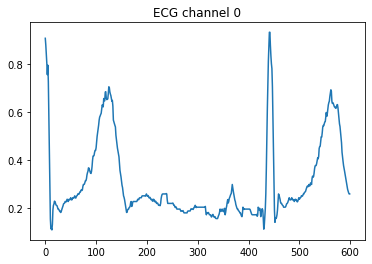

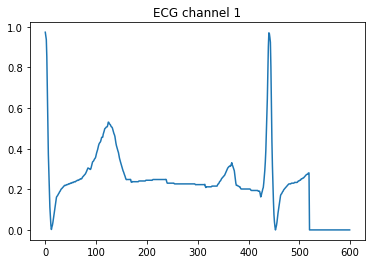

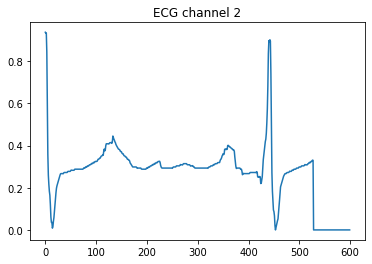

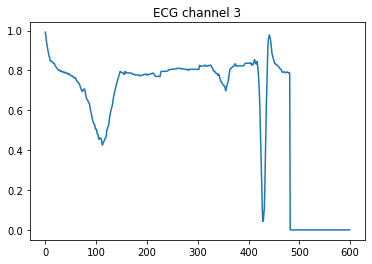

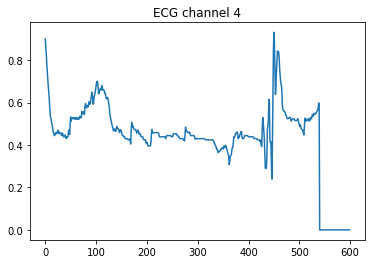

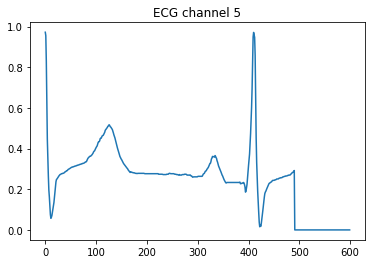

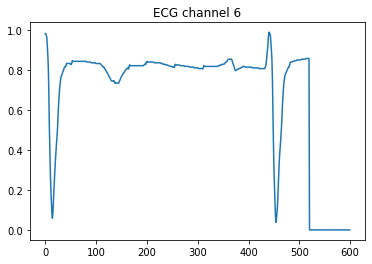

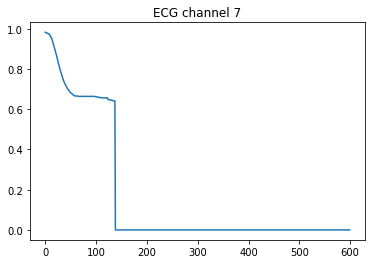

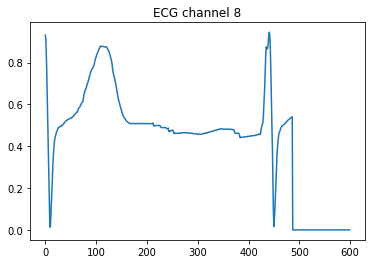

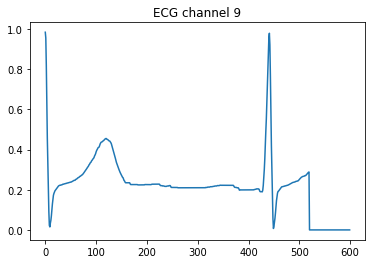

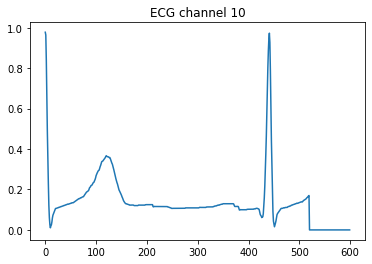

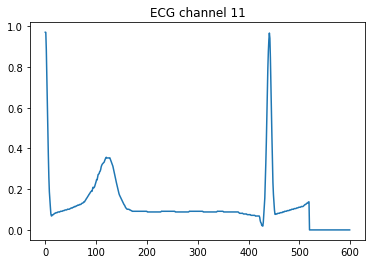

In [9]:
test_record_name = "00061_hr"
ecg = load_record(record_name=test_record_name, is_train=True)
for lead in range(12):
    beat = extract_beat(ecg, to_print=True, ecg_channel=lead, BEAT_LENGTH=BEAT_LENGTH)


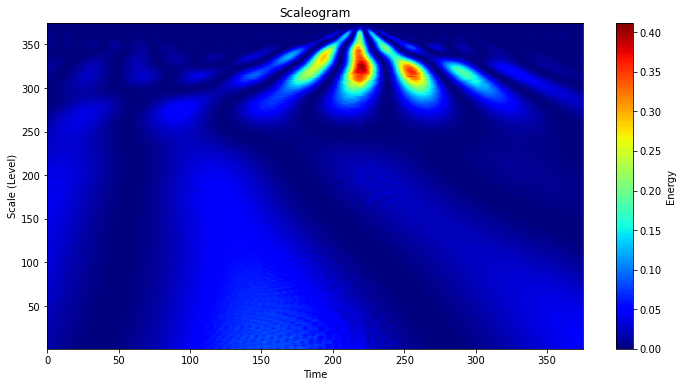

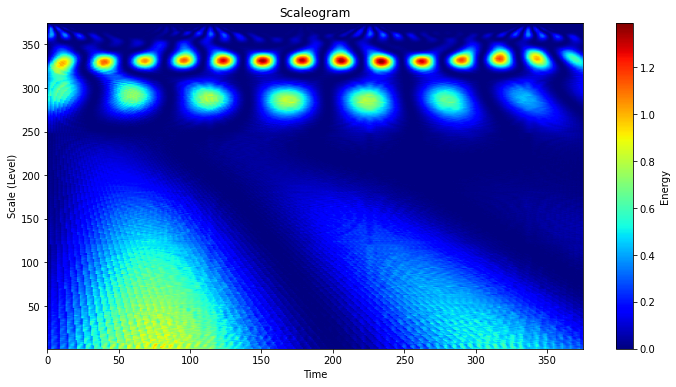

array([[[-5.11135161e-03,  8.14052448e-02,  1.70784816e-02, ...,
          3.18548060e-04,  9.85614723e-04, -1.76216811e-02],
        [ 7.73025351e-03, -1.15148857e-01,  1.11900523e-01, ...,
          1.19958203e-02, -2.79425718e-02,  2.69387215e-02],
        [ 1.82646513e-02, -1.98017538e-01,  2.43873964e-03, ...,
         -2.87715215e-02, -5.85556356e-03,  4.95315753e-02],
        ...,
        [-4.57400680e-01, -4.26632553e-01, -3.94064009e-01, ...,
          5.35262644e-01,  5.04342556e-01,  4.98683453e-01],
        [-4.64602232e-01, -4.50013667e-01, -4.20343190e-01, ...,
          5.60278535e-01,  5.25137365e-01,  5.19194067e-01],
        [-4.45836335e-01, -4.52129245e-01, -4.29330707e-01, ...,
          6.21042848e-01,  5.40213823e-01,  5.27990460e-01]],

       [[ 1.30857602e-02,  6.63196668e-02, -3.34215201e-02, ...,
         -5.29845478e-04, -2.44049216e-03, -3.41826095e-03],
        [-2.12086104e-02, -1.08971454e-01,  1.19305894e-01, ...,
         -3.92003189e-04, -1.57126400e

In [10]:


from preprocessing_CWT_DWT.transforming_wavelets import Pipeline_CWT_CNN

pipeline = Pipeline_CWT_CNN(prefix="./train/", segment_num=2)
pipeline.run_pipeline('00009_hr',  test=True)
pipeline.run_pipeline('00034_hr',  test=True)


In [11]:

class Transformator():
    """ Класс-пайплайн от датафрейма train.gts до трансформированных данных ЭКГ и аннотаций для тренировки модели.
    
    """
    def __init__(self,args, is_train):
        self.is_train = is_train
        self.args = args
    
    def run_pipeline(self, transformation_func, df):
        result_df = self.pipeline_ecg(transformation_func, df)
        self.pipeline_annotations(result_df)

    # transformation func - function that transforms record to any 
    def pipeline_ecg(self, transformation_func, df):

        # рекорды с миокардом дублируются дважды и к названиям добавляются cyффиксы _1, _2
        # делается чтобы оверсемплить сэмплы с миокардом, потому что имбаланс.
        duplicated_rows = df[df['myocard'] == 1].copy()

        # Add a suffix to 'record_name' column for the duplicated rows
        duplicated_rows['record_name'] = duplicated_rows['record_name'] + '_1'

        # Duplicate the rows again and add a different suffix
        duplicated_rows_2 = duplicated_rows.copy()
        duplicated_rows_2['record_name'] = duplicated_rows_2['record_name'].str.replace(
            '_1', '_2')

        # Append the duplicated rows to the original DataFrame
        result_df = pd.concat([df, duplicated_rows, duplicated_rows_2], ignore_index=True)

        record_names = result_df['record_name'].to_list()
        result_df['correct_transformation'] = True 
        for record_name in tqdm(record_names):
            transformed = transformation_func(record_name, **self.args)
            
            if self.is_train: 
                if(not os.path.exists("./transformed_train/")):
                    os.mkdir("./transformed_train/")
                np.save(f"./transformed_train/{record_name}.npy", transformed) 
            else:
                if(not os.path.exists("./transformed_test/")):
                    os.mkdir("./transformed_test/")
                np.save(f"./transformed_test/{record_name}.npy", transformed) 

        return result_df 

    def pipeline_annotations(self, df):
        annotations = df[['record_name', 'strat_fold','myocard']]   

        val_annotations = annotations[annotations['strat_fold'].isin([8, 9, 10])]
        train_annotations = annotations[annotations['strat_fold'].isin(range(1,8))]
        
        # shuffle rows
        val_annotations = val_annotations.sample(frac=1)
        train_annotations = train_annotations.sample(frac=1)
        
        val_annotations.to_csv('./val_annotations.csv', index=False)
        train_annotations.to_csv('./train_annotations.csv', index=False)
        
        print("number of validation samples:",len(val_annotations) )
        print("number of train samples:",len(train_annotations))

        print("validation percentage:",len(val_annotations) / len(annotations))
        print("train percentage:",len(train_annotations) / len(annotations))

        print("VALIDATION myocard percentage", val_annotations["myocard"].value_counts(normalize=True))
        print("TTRAIN myocard percentage", train_annotations["myocard"].value_counts(normalize=True))
    
    def check_correctnes(self, df, pipeline_func):
        test_df = df.iloc[:50]
        self.run_pipeline(pipeline_func, test_df)


In [12]:
transformator = Transformator(args={}, is_train=True)
pipeline_ecg = Pipeline_CWT_CNN(prefix="./train/", segment_num=2)
pipeline_func = pipeline_ecg.run_pipeline


In [13]:
transformator.check_correctnes(df, pipeline_func)
test_train_annotations = pd.read_csv("train_annotations.csv")
test_val_annotations = pd.read_csv("val_annotations.csv")
print(test_train_annotations)
test_val_annotations

  0%|          | 0/44 [00:00<?, ?it/s]

number of validation samples: 35
number of train samples: 27
validation percentage: 0.5645161290322581
train percentage: 0.43548387096774194
VALIDATION myocard percentage 0    0.742857
1    0.257143
Name: myocard, dtype: float64
TTRAIN myocard percentage 0    0.666667
1    0.333333
Name: myocard, dtype: float64
   record_name  strat_fold  myocard
0     00322_hr           4        0
1     00209_hr           2        0
2     00052_hr           1        0
3   00348_hr_1           4        1
4     00150_hr           7        0
5     00422_hr           1        0
6   00486_hr_2           1        1
7     00348_hr           4        1
8     00551_hr           1        0
9     00356_hr           6        0
10    00275_hr           1        0
11    00421_hr           1        0
12  00348_hr_2           4        1
13    00469_hr           5        0
14    00096_hr           1        0
15    00061_hr           6        0
16  00486_hr_1           1        1
17    00247_hr           1        0
18 

,record_name,strat_fold,myocard
0,00523_hr,8,0
1,00172_hr,10,0
2,00478_hr,10,0
3,00353_hr,8,0
4,00175_hr,10,0
5,00269_hr_1,8,1
6,00269_hr,8,1
7,00170_hr,9,0
8,00132_hr,10,0
9,00216_hr,9,0


In [14]:
transformator.run_pipeline(pipeline_func, df)

  0%|          | 0/1686 [00:00<?, ?it/s]

number of validation samples: 953
number of train samples: 1978
validation percentage: 0.32514500170590244
train percentage: 0.6748549982940976
VALIDATION myocard percentage 0    0.571878
1    0.428122
Name: myocard, dtype: float64
TTRAIN myocard percentage 0    0.576845
1    0.423155
Name: myocard, dtype: float64
